In [2]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()
model = ChatOpenAI(model="gpt-4o", temperature=0.01)
print(model.invoke('안녕하세요!'))


content='안녕하세요! 어떻게 도와드릴까요?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmpl-BX0ijONvlI4M1xJ3jJrCOeCRgyElZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--f520b991-a916-4ddd-9c5b-03c0e73bf495-0' usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [3]:
from typing import Annotated # annotated는 타입 힌트를 사용할 때 사용하는 함수
from typing_extensions import TypedDict # TypedDict는 딕셔너리 타입을 정의할 때 사용하는 함수

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    State 클래스는 TypedDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]): 메시지들은 "list" 타입을 가집니다. 
        주석에 있는 'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.
        (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다)
    """
    messages: Annotated[list[str], add_messages]

# StateGraph 클래스를 사용하여 State 타입의 그래프를 생성합니다.
graph_builder = StateGraph(State) 

In [4]:
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

import bs4
from langchain_community.document_loaders import WebBaseLoader

# 도구 함수 정의
@tool
def get_current_time(timezone: str, location: str) -> str:
    """현재 시각을 반환하는 함수."""
    try:
        tz = pytz.timezone(timezone)
        now = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
        result = f'{timezone} ({location}) 현재시각 {now}'
        # print(result)
        return result
    except pytz.UnknownTimeZoneError:
        return f"알 수 없는 타임존: {timezone}"
    
@tool
def get_web_search(query: str, search_period: str='m') -> str:
    """
    웹 검색을 수행하는 함수.

    Args:
        query (str): 검색어
        search_period (str): 검색 기간 (e.g., "w" for past week (default), "m" for past month, "y" for past year, "d" for past day)

    Returns:
        str: 검색 결과
    """
    wrapper = DuckDuckGoSearchAPIWrapper(
        # region="kr-kr", 
        time=search_period
    )

    print('\n-------- WEB SEARCH --------')
    print(query)
    print(search_period)

    search = DuckDuckGoSearchResults(
        api_wrapper=wrapper,
        # source="news",
        results_separator=';\n'
    )

    searched = search.invoke(query)
    
    for i, result in enumerate(searched.split(';\n')):
        print(f'{i+1}. {result}')
    
    return searched

# 도구 바인딩
tools = [get_current_time, get_web_search]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
tools[0].invoke({"timezone": "Asia/Seoul", "location": "서울"})

'Asia/Seoul (서울) 현재시각 2025-05-14 16:23:04'

In [7]:
pip install -U duckduckgo-search


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 7.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [duckduckgo-search]lxml]
Note: you may need to restart the kernel to use updated packages.


In [9]:
tools[1].invoke({"query": "랭그래프", "search_period": "m"})


-------- WEB SEARCH --------
랭그래프
m


DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

In [10]:
from langchain_community.tools import DuckDuckGoSearchRun
import time

search_tool = DuckDuckGoSearchRun()

# 요청 전 대기
time.sleep(5)

result = search_tool.invoke({"query": "랭그래프"})
print(result)


배경 및 목적 이번 13기 ai 스터디에 앞서, 1day 1랭그래프, 즉 하루에 1개의 랭그래프 개념을 설명하는 부분을 기획하게 됐습니다. 13기 랭그래프로 나만의 ai 에이전트 만들기 스터디가 궁금하다면!? -> 링크 접속하기 이 프로젝트의 목표는 랭그래프를 쉽게 입문하실 수 있게 상세한 개념부터 코드까지 ... 랭체인 LangGraph란?랭체인(LangChain)은 대규모 언어 모델(LLM)을 활용한 애플리케이션 개발을 용이하게 해주는 강력한 프레임워크입니다. 랭체인은 다양한 모듈과 도구를 제공하여 LLM 기반 애플리케이션 개발 과정을 단순화하고 효율성을 높여줍니다.랭그래프(LangGraph)는 랭체인의 기능을 확장하여 ... 랭그래프 (LangGraph)는 엔터프라이즈급 AI 워크플로우 관리를 위한 강력한 도구로, 유연한 그래프 기반 구조와 자율적 의사결정 시스템을 접목한 RAG, 다중 에이전트 협업, 비구조화 데이터 처리 등에 특화되어 있습니다. LangGraph(랭그래프)는 이러한 요구 사항을 효과적으로 해결하기 위한 Workflow 설계 도구로 Graph의 Node, Edge를 기반으로 하여 개별 Node의 State를 효과적으로 관리할 수 있도록 한다. LangGraph(랭그래프)는 LangChain(랭체인)을 기반으로 하는 에이전트 프레임워크입니다. LangGraph(랭그래프)의 주요 특징은 복잡한 제어구조를 가진 워크플로우를 유연하게 표현할 수 있다는 점입니다. 이는 LangGraph(랭그래프)가 워크플로우 표현에 그래프를 채택하고 ...


In [12]:
from langchain_community.tools import DuckDuckGoSearchRun
import time

search_tool = DuckDuckGoSearchRun()

# 요청 전 대기
time.sleep(5)

result = search_tool.invoke({"query": "MK실험실"})
print(result)


DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

In [13]:
import time
from langchain_community.tools import DuckDuckGoSearchRun
from duckduckgo_search.exceptions import DuckDuckGoSearchException

search_tool = DuckDuckGoSearchRun()

def safe_search(query, retries=5, delay=10):
    for i in range(retries):
        try:
            return search_tool.invoke({"query": query})
        except DuckDuckGoSearchException as e:
            print(f"[{i+1}/{retries}] Rate limit 발생. {delay}초 대기 후 재시도 중...")
            time.sleep(delay)
    raise Exception("DuckDuckGo 검색에 반복적으로 실패했습니다.")

# 사용 예시
result = safe_search("MK실험실")
print(result)


mk 울트라 계획(project mk-ultra)은 냉전 시대인 1960년대에 미국 중앙 정보국(cia) 및 미군 등이 주축이 되어 민간인을 대상으로 시도했던 불법 세뇌 실험이다. 비슷한 성격의 실험 계획인 'mk 나오미(mk-naomi)'와 'mk 델타(mk-delta)'의 후속 계획이며, 암호명 '울트라(ultra)'는 제2차 세계 대전 당시 '최고 등급의 ... #미스터리 #음모론 #공포 #mk울트라 #cia #세뇌 #인간실험 #lsd #ai #심리조작 #극비프로젝트 mk 울트라: cia가 숨긴 악마의 실험실, 인간 정신을 파괴한 ... 미국 백악관이 코로나19 바이러스가 실험실에서 유출됐다는 주장을 담은 공식 홈페이지를 공개했다. 백악관은 18일(현지 시각) '실험실 유출(Lab Leak)'이라는 단어를 크게 실은 홈페이지를 공개했다. 또 도널드 트럼프 미국 대통령의 전신사진도 함께 첨부했다. 공화당이 주도하는 미국 하원 '코로나바이러스 팬데믹 특별 소위원회'는 520쪽에 이르는 보고서를 발표하면서 "코로나19를 일으키는 바이러스인 sars-cov-2는 중국 우한의 실험실 혹은 연구와 관련된 사고 때문에 출현했을 공산이 크다"고 주장한 바 있다. 실리콘밸리 상륙작전2024년 1월까지는 서울에서 대한민국을 대상으로 서비스를 하고 싶었지만, 점차 미국에서 전 세계를 대상으로 서비스를 제공하고 싶다는 열망이 커졌습니다. 결국 실리콘밸리를 동경하게 되었고, 그해 8월, 좋은 기회로 학교에 지원을 받아 미국에 갈 수 있게 되었습니다. 미국에 ...


In [15]:
import time
from langchain_community.tools import DuckDuckGoSearchRun
from duckduckgo_search.exceptions import DuckDuckGoSearchException

search_tool = DuckDuckGoSearchRun()

def safe_search(query, retries=5, delay=10):
    for i in range(retries):
        try:
            return search_tool.invoke({"query": query})
        except DuckDuckGoSearchException as e:
            print(f"[{i+1}/{retries}] Rate limit 발생. {delay}초 대기 후 재시도 중...")
            time.sleep(delay)
    raise Exception("DuckDuckGo 검색에 반복적으로 실패했습니다.")

# 사용 예시
result = safe_search("MK실험실 김문기 mkisos")
print(result)


[1/5] Rate limit 발생. 10초 대기 후 재시도 중...
[2/5] Rate limit 발생. 10초 대기 후 재시도 중...
[3/5] Rate limit 발생. 10초 대기 후 재시도 중...
[4/5] Rate limit 발생. 10초 대기 후 재시도 중...
[5/5] Rate limit 발생. 10초 대기 후 재시도 중...


Exception: DuckDuckGo 검색에 반복적으로 실패했습니다.

In [16]:
for tool in tools:
    print(tool.name, tool)

get_current_time name='get_current_time' description='현재 시각을 반환하는 함수.' args_schema=<class 'langchain_core.utils.pydantic.get_current_time'> func=<function get_current_time at 0x1146a9300>
get_web_search name='get_web_search' description='웹 검색을 수행하는 함수.\n\nArgs:\n    query (str): 검색어\n    search_period (str): 검색 기간 (e.g., "w" for past week (default), "m" for past month, "y" for past year, "d" for past day)\n\nReturns:\n    str: 검색 결과' args_schema=<class 'langchain_core.utils.pydantic.get_web_search'> func=<function get_web_search at 0x114930c20>


In [17]:
model_with_tools = model.bind_tools(tools) # GPT 언어모델에 도구 연결

def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

    반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리. 
          형식은 {"messages": [응답 메시지]}입니다.
    """
    return {"messages": model_with_tools.invoke(state["messages"])}

graph_builder.add_node("generate", generate)

In [18]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
    도구를 실행하는 노드 클래스입니다. 마지막 AIMessage에서 요청된 도구를 실행합니다.
    Attributes:
        tools_by_name (dict): 도구 이름을 키로 하고 도구 객체를 값으로 가지는 사전입니다.
    Methods:
        __init__(tools: list): 도구 객체들의 리스트를 받아서 초기화합니다.
        __call__(inputs: dict): 입력 메시지를 받아서 도구를 실행하고 결과 메시지를 반환합니다.
    """
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:    # ①
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):    # ②
        if messages := inputs.get("messages", []):
            # inputs에 messages가 있으면 messages를 가져오고 없으면 빈 리스트를 가져옵니다.
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:    # ③
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": messages + outputs}

tool_node = BasicToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [19]:
def route_tools(state: State):
    """
    마지막 메시지에 도구 호출이 있는 경우 ToolNode로 라우팅하고,
    그렇지 않은 경우 끝으로 라우팅하기 위해 conditional_edge에서 사용합니다.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"tool_edge 입력 상태에서 메시지를 찾을 수 없습니다: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

graph_builder.add_edge(START, "generate")

graph_builder.add_conditional_edges(
    "generate",
    route_tools,
    {"tools": "tools", END: END},
)
# 도구가 호출될 때마다 다음 단계를 결정하기 위해 챗봇으로 돌아갑니다.
graph_builder.add_edge("tools", "generate")
graph = graph_builder.compile()


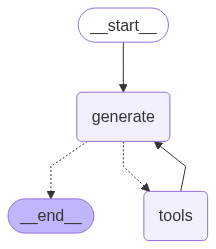

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [21]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content="지금 서울 몇시야?")]

gathered = None

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end='')

        if gathered is None:
            gathered = msg
        else:
            gathered = gathered + msg

gathered

지금 서울은 2025년 5월 14일 오후 4시 34분입니다.

AIMessageChunk(content='지금 서울은 2025년 5월 14일 오후 4시 34분입니다.', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_dhQ0RaW2gZbeuK1u2jwwYtFE', 'function': {'arguments': '{"timezone":"Asia/Seoul","location":"서울"}', 'name': 'get_current_time'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_callsstop', 'model_name': 'gpt-4o-2024-08-06gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276fp_f5bdcc3276', 'service_tier': 'defaultdefault'}, id='run--8bf5fb76-fc2e-456d-bf77-a3db59eb514b', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': '서울'}, 'id': 'call_dhQ0RaW2gZbeuK1u2jwwYtFE', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"서울"}', 'id': 'call_dhQ0RaW2gZbeuK1u2jwwYtFE', 'index': 0, 'type': 'tool_call_chunk'}])

In [22]:
from langchain_core.messages import AIMessageChunk, SystemMessage

about = "대한민국 대통령"

inputs = [SystemMessage(content=f"""
너는 신문기자이다. 
최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.  

- 최근 어떤 이슈가 있는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘. 
- 그 내용으로 원고를 작성하기 위한 목차를 만들고, 목차 내용을 채우기 위해 추가로 검색할 내용을 리스트로 정리해봐. 
- 검색할 리스트를 토대로 재검색을 한다. 
- 목차에 있는 내용을 작성하기 위해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해라.
- 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋다. 

더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성하라.
제목, 부제, 리드문, 본문 의 구성으로 작성하라. 본문 내용은 심층 분석 기사에 맞게 구체적이고 깊이 있게 작성해야 한다. 
    
""")]

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end='')


-------- WEB SEARCH --------
대한민국 대통령 최근 이슈
m


DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

In [26]:
from langchain_core.messages import AIMessageChunk, SystemMessage

about = "서울월드컵 경기장 잔디 문제"

inputs = [SystemMessage(content=f"""
너는 신문기자이다. 
최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.  

- 최근 어떤 이슈가 있는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘. 
- 그 내용으로 원고를 작성하기 위한 목차를 만들고, 목차 내용을 채우기 위해 추가로 검색할 내용을 리스트로 정리해봐. 
- 검색할 리스트를 토대로 재검색을 한다. 
- 목차에 있는 내용을 작성하기 위해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해라.
- 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋다. 

더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성하라.
제목, 부제, 리드문, 본문 의 구성으로 작성하라. 본문 내용은 심층 분석 기사에 맞게 구체적이고 깊이 있게 작성해야 한다. 
    
""")]

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end='')


-------- WEB SEARCH --------
서울월드컵 경기장 잔디 문제
m


DuckDuckGoSearchException: https://lite.duckduckgo.com/lite/ 202 Ratelimit